# Análisis Exploratorio de Datos del Set 'Standing'
## Carga de Datos

In [1]:
import numpy as np 
import pandas as pd 
import os

standing_df = pd.read_csv("IJBA-2023-01-22.standing.csv", delimiter=";", decimal=",")

standing_df.head()

,time,gFx,gFy,gFz,TgF,Actividad,movil,sujeto
0,0.002298,-0.1041,0.2050,0.9173,0.946,standing,Samsung Galaxy S10,Isaías
1,0.002641,-0.1038,0.1962,0.9337,0.960,standing,Samsung Galaxy S10,Isaías
2,0.007168,-0.0977,0.1857,0.9535,0.976,standing,Samsung Galaxy S10,Isaías
3,0.015116,-0.0872,0.1722,0.9706,0.990,standing,Samsung Galaxy S10,Isaías
4,0.017748,-0.0772,0.1578,0.9877,1.003,standing,Samsung Galaxy S10,Isaías


In [2]:
# Duración total del dataset
duration = standing_df['time'][standing_df.index[-1]]

# Frecuencia de muestreo (s^-1)
fs = standing_df[ (standing_df['time']>0) & (standing_df['time']<1) ]['TgF'].count()

# Intervalo en milisegundos entre cada muestra
interval = (1/fs) * 1000

print("%.1f seconds serie, interval between consecutive points = %.1f milliseconds" % (duration, interval))

12.7 seconds serie, interval between consecutive points = 5.1 milliseconds


In [3]:
# Cambiamos el índice a la columna 'time'
standing_df.set_index('time', inplace = True)
standing_df.head()

,gFx,gFy,gFz,TgF,Actividad,movil,sujeto
time,,,,,,,
0.002298,-0.1041,0.2050,0.9173,0.946,standing,Samsung Galaxy S10,Isaías
0.002641,-0.1038,0.1962,0.9337,0.960,standing,Samsung Galaxy S10,Isaías
0.007168,-0.0977,0.1857,0.9535,0.976,standing,Samsung Galaxy S10,Isaías
0.015116,-0.0872,0.1722,0.9706,0.990,standing,Samsung Galaxy S10,Isaías
0.017748,-0.0772,0.1578,0.9877,1.003,standing,Samsung Galaxy S10,Isaías


## Análisis Exploratorio de Datos
### Gráficos de Evolución Temporal
El siguiente gráfico muestra la evolución de la aceleración en cada una de las tres dimensiones (x, y, z) y su sumatorio.

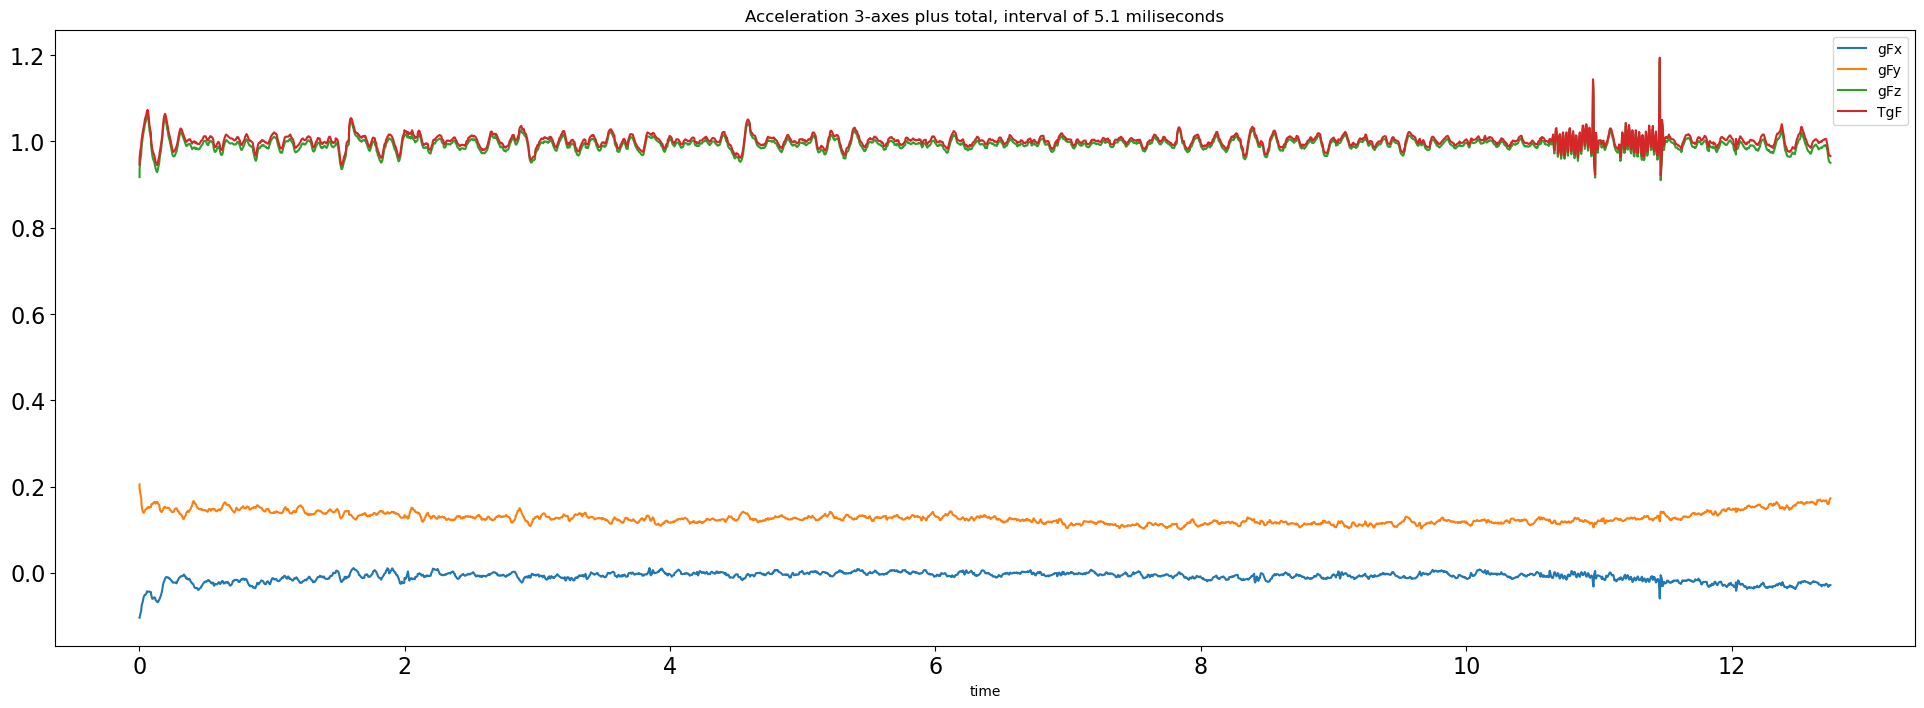

In [4]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 24, 8
standing_df.plot(title="Acceleration 3-axes plus total, interval of %.1f miliseconds" % interval, fontsize=16)
plt.show()

En el gráfico superior podemos observar que:
- La fuerza ejercida en el eje X es constante y cercana a cero, ligéramente negativa.
- La fuerza ejercida en el eje Y es constante y cercana a cero, ligéramente positiva.
- La fuerza ejercida en el eje Z es constante y cercana a uno.
- La fuerza total es constante y cercana a uno.
- Durante los dos primeros segundos, así como los dos últimos, se observan fluctuaciones debidas a la manipulación del dispositivo detector.

Por las razones expuestas, y para poder seguir realizando el EDA con datos representativos y de calidad, limpiaremos el dataset de fluctuaciones.

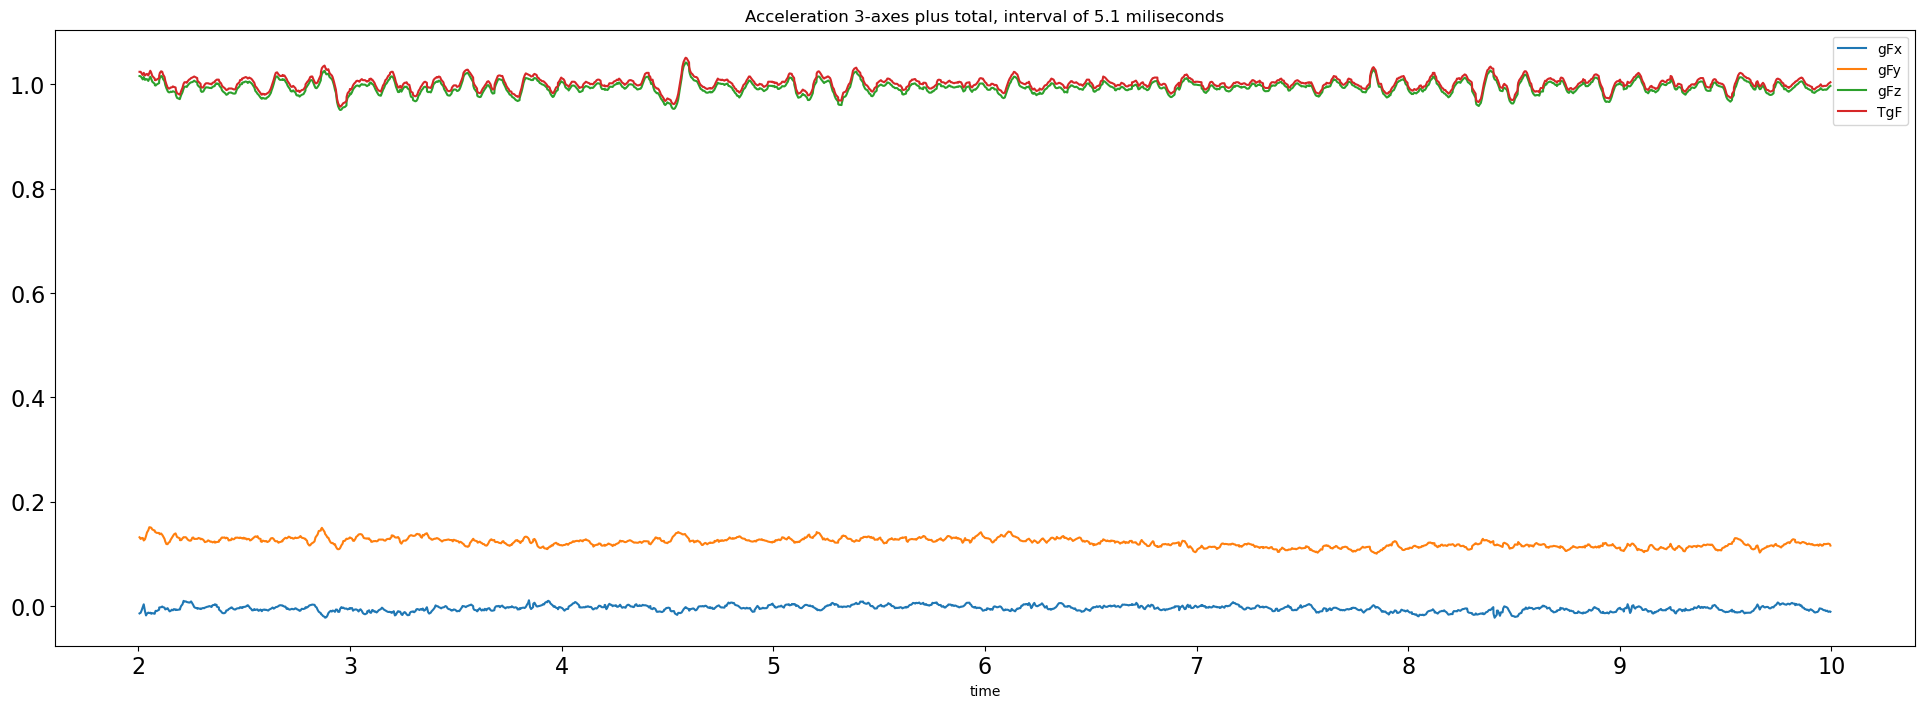

In [5]:
# Eliminamos los primeros y últimos segundos
standing_df = standing_df.loc[2:10][:]

# Graficamos de nuevo para ver el resultado
rcParams['figure.figsize'] = 24, 8
standing_df.plot(title="Acceleration 3-axes plus total, interval of %.1f miliseconds" % interval, fontsize=16)
plt.show()

### Histograma de las Cuatro Señales de Aceleración
Cada gráfico muestra el histograma de cada una de las cuatro aceleraciones.

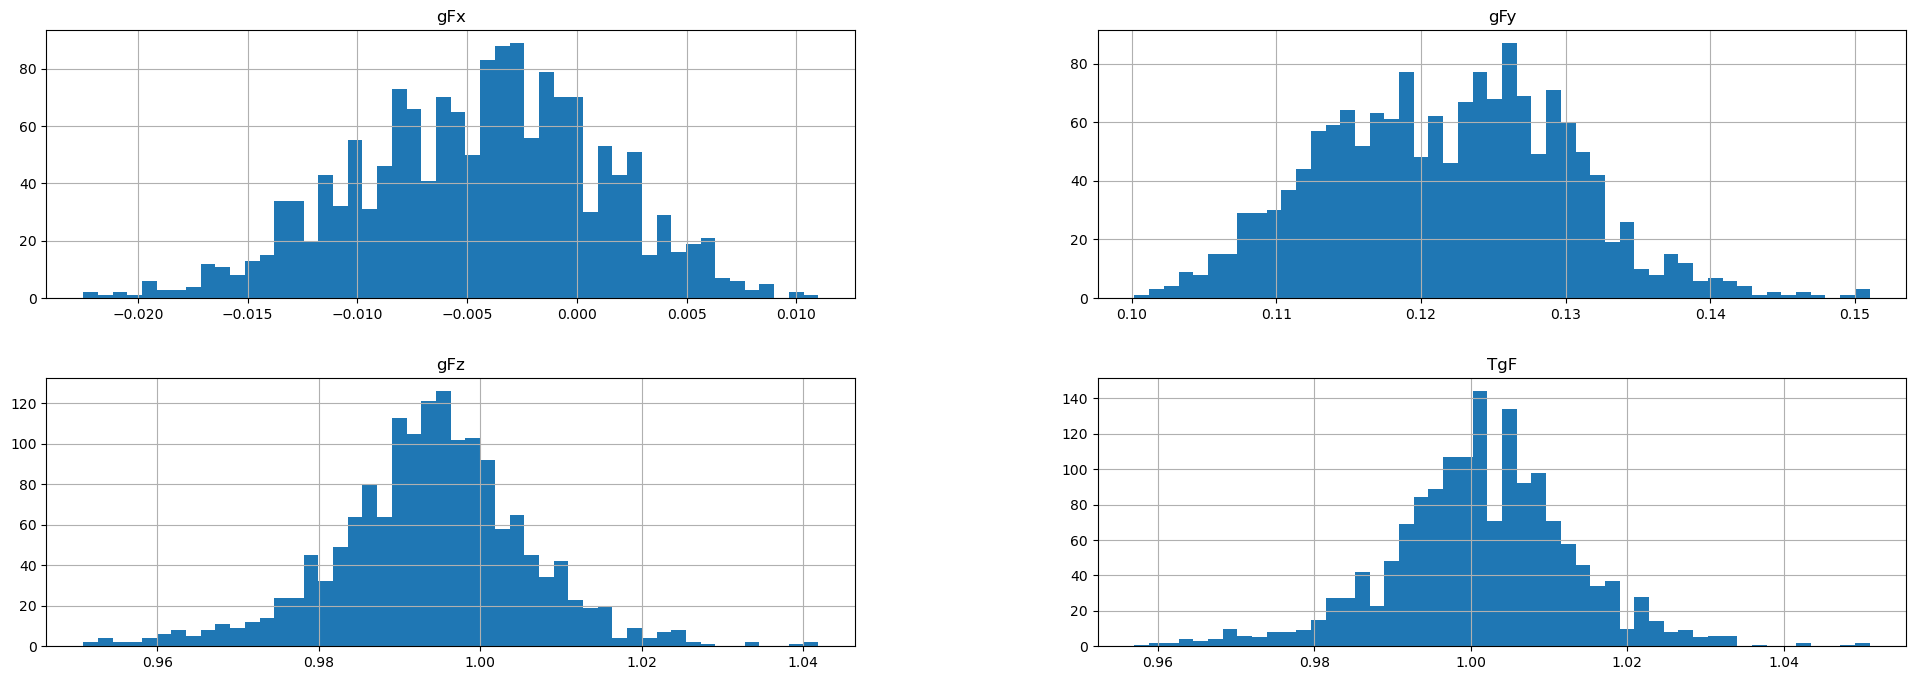

In [6]:
standing_df.hist(bins=50)
plt.show()

In [7]:
standing_df.describe()

,gFx,gFy,gFz,TgF
count,1577.000000,1577.000000,1577.000000,1577.000000
mean,-0.004508,0.121701,0.993844,1.001325
std,0.005620,0.008396,0.012046,0.012000
min,-0.022500,0.100200,0.950800,0.957000
25%,-0.008300,0.115300,0.986900,0.994000
50%,-0.004200,0.122100,0.994300,1.002000
75%,-0.000700,0.127800,1.000900,1.008000
max,0.011000,0.151000,1.041900,1.051000


En el gráfico superior y en la tabla con la estadística descriptiva del set, podemos observar que:
- La fuerza ejercida en el eje X tiene una distribución aproximadamente normal, con una media de -0.005 y una mediana de -0.004.
- La fuerza ejercida en el eje Y tiene una distribución aproximadamente normal, con una media de 0.122 y una mediana de 0.122.
- La fuerza ejercida en el eje Z tiene una distribución aproximadamente normal, con una media de 0.994 y una mediana de 0.994.
- La fuerza total tiene una distribución aproximadamente normal, con una media de 1.001 y una mediana de 1.002.

### Gráficos de funciones de densidad de probabilidad de señales de vibración
El KDE Plot descrito como Kernel Density Estimate se utiliza para visualizar la Densidad de Probabilidad de una variable continua.

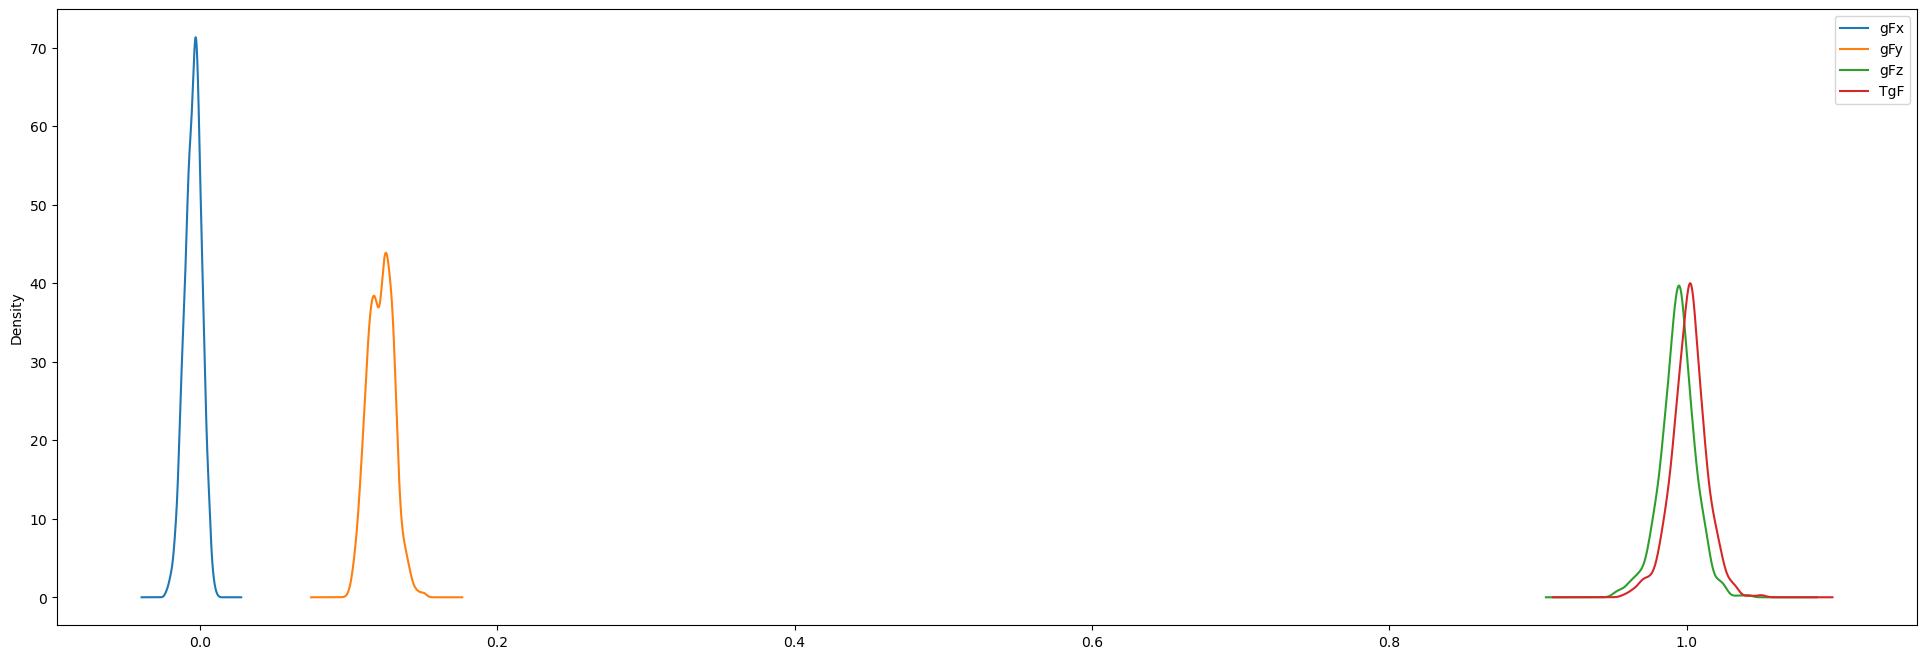

In [8]:
standing_df.plot(kind='kde')
plt.show()

En el gráfico podemos ver de otra forma las conclusiones ya expuestas en el punto anterior.

### Autocorrelación de los Ejes
#### Lag Plot
Un lag plot es un gráfico que se utiliza para detectar patrones de dependencia temporal en una serie de tiempo. Consiste en trazar cada valor de una serie de tiempo contra el valor que le sigue inmediatamente.

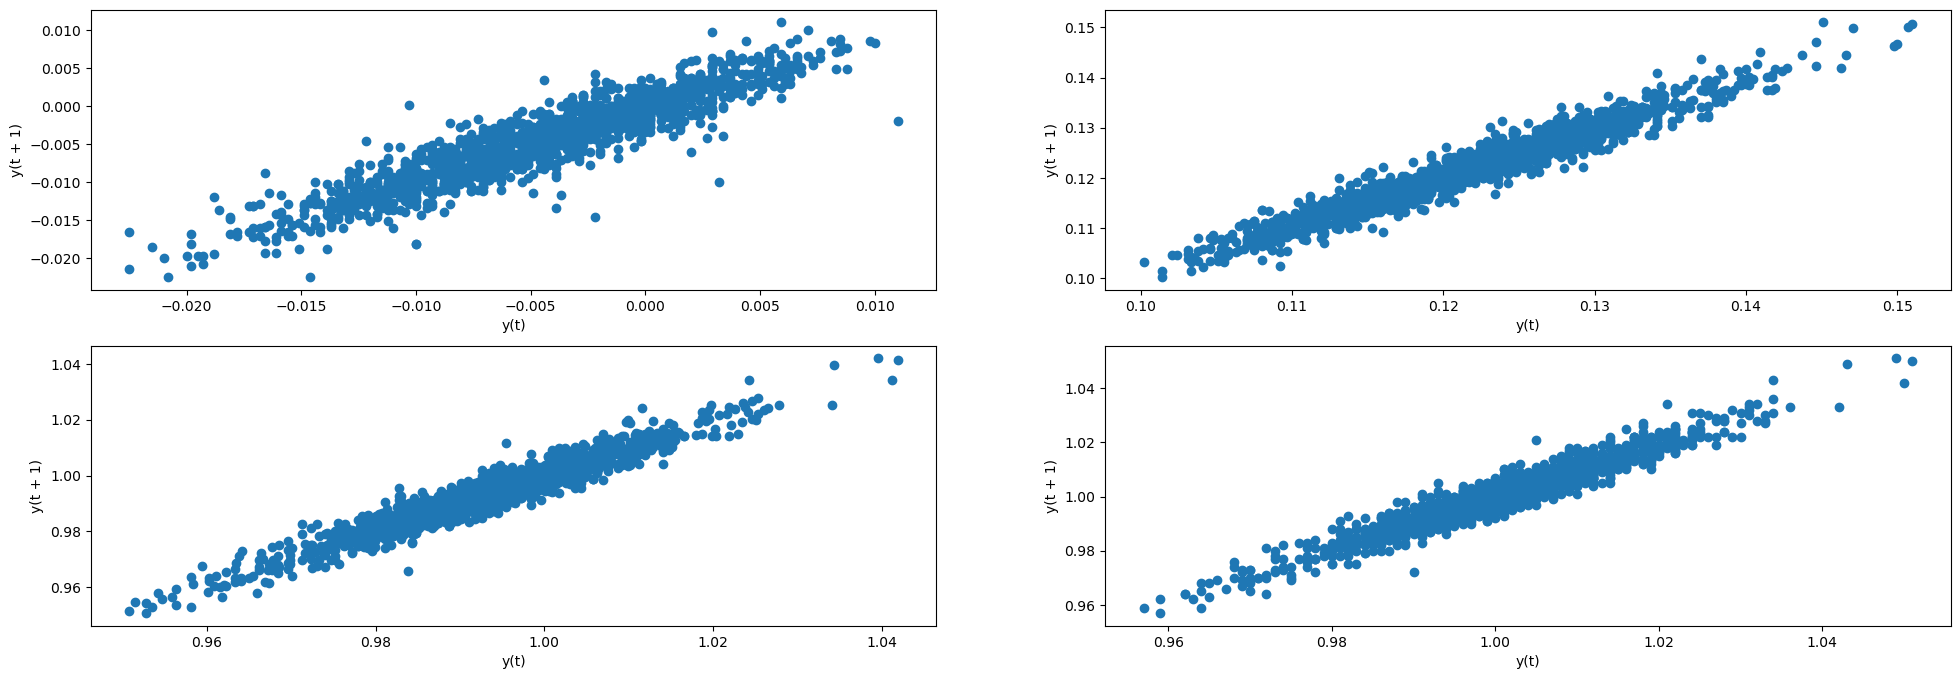

In [9]:
from pandas.plotting import lag_plot

fig, axs = plt.subplots(2, 2)
lag_plot(standing_df['gFx'], ax=axs[0, 0])
lag_plot(standing_df['gFy'], ax=axs[0, 1])
lag_plot(standing_df['gFz'], ax=axs[1, 0])
lag_plot(standing_df['TgF'], ax=axs[1, 1])
plt.show()


Como se puede observar, los puntos están distribuidos alrededor de una línea diagonal, lo que indica que los valores en una posición específica de la serie de tiempo están relacionados con los valores en una posición específica en el futuro, en este caso a través de una serie temporal estacionaria que no tiene tendencia ni estacionalidad.

#### Autocorrelation Plot
Un autocorrelation plot (ACF) es un gráfico que se utiliza para medir la dependencia temporal entre los valores de una serie de tiempo. El gráfico muestra la autocorrelación entre los valores de una serie de tiempo a diferentes desplazamientos (o retrasos) llamados lags.

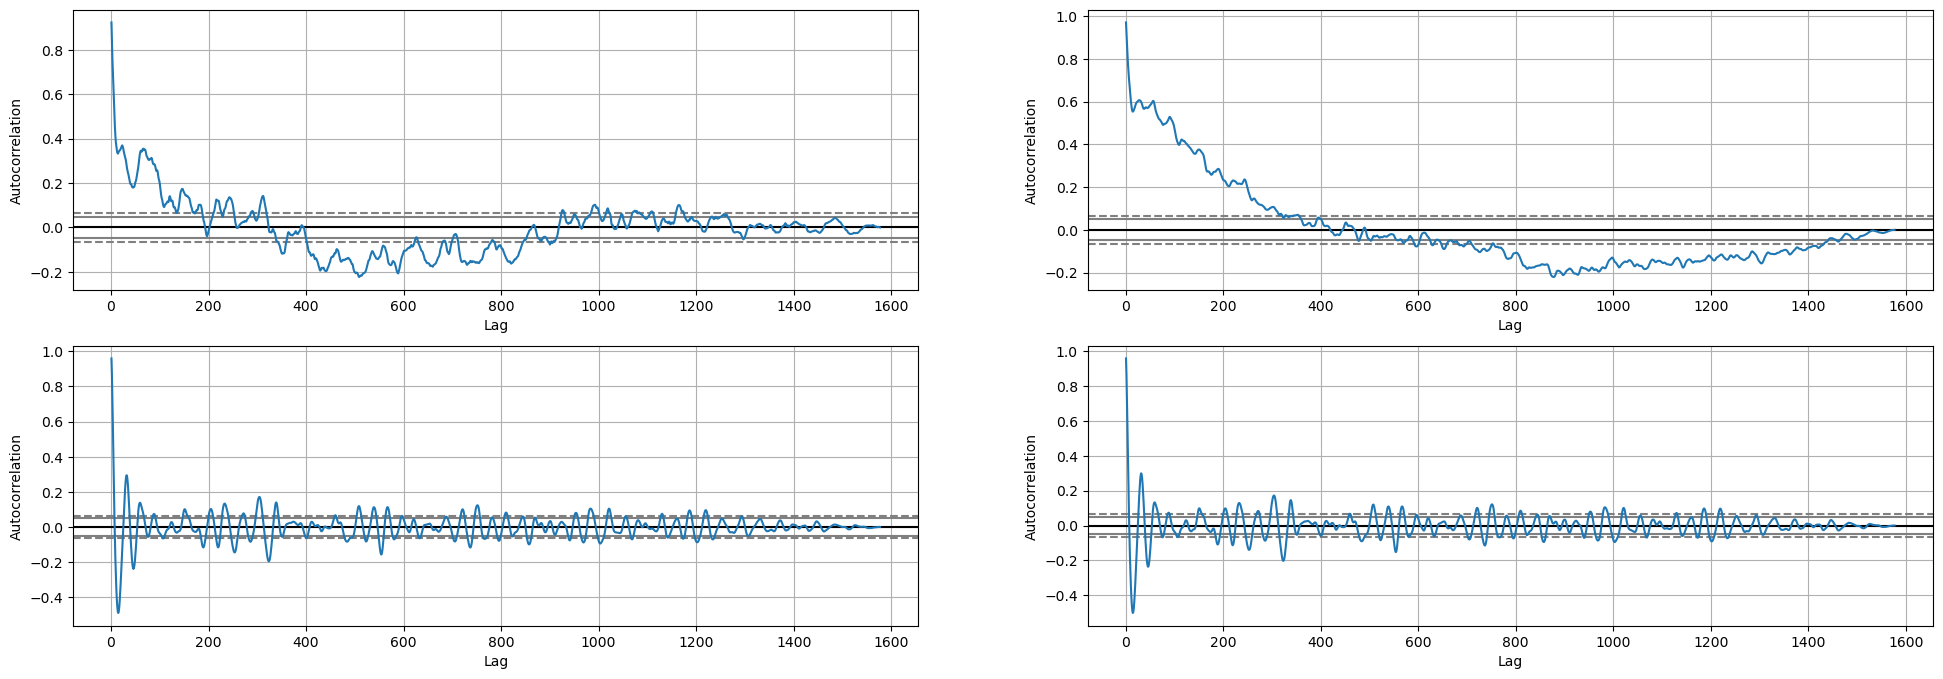

In [10]:
from pandas.plotting import autocorrelation_plot

fig, axs = plt.subplots(2, 2)
autocorrelation_plot(standing_df['gFx'], ax=axs[0, 0])
autocorrelation_plot(standing_df['gFy'], ax=axs[0, 1])
autocorrelation_plot(standing_df['gFz'], ax=axs[1, 0])
autocorrelation_plot(standing_df['TgF'], ax=axs[1, 1])
plt.show()

En los gráficos anteriores no observamos ningún patrón que se repita, lo que indica que la serie de tiempo no tiene un patrón estacional. De hecho, tiene un patrón más estacionario. 